<a href="https://colab.research.google.com/github/Anitesh123/Book_recommendatation_system/blob/main/Book_recommendatation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**<u>Project Name - Book Recommendation System</u>**</center>

##### **Project Type**    - Unsupervised
#### **<u>Contribution -</u>** Team
##### **Team Member 1 -** Moin Qureshi
##### **Team Member 2 -** Anitesh kumar
##### **Team Member 3 -** Bvamsi Krishna

# **Project Summary -**


1. **Anitesh**
  * EDA
  * Preprocessing & Clean-Up

2. **Moin Qurashi**
  * Model Implementation  

3. **Bvamsi Krishna**
  * Model Evaluation



--------------------------------------------------------------------------------


* First of all we were provided with three datasets namely book,user, and rating. We studied all datasets in that the various columns were ISBN	Book-Title,	Book-Author,	Year-Of-Publication,	Publisher,	Image-URL-S(Small)	Image-URL-M(Medium), Image-URL-L(Large), User-ID, Book-Rating,Location,and	Age. ISBN is International Standard Book Number.

* Then we started with exploratory data analysis by combine all three datasets and making a new dataframe(combine_df). So we proceeded with looking for missing values and outlier detection(year, and age columns) in the given dataset. We dropped te records where negligible values were missing. For age we are interested in the age group of 5-100 years. So by considering every other value as an outliers, we converted those into null values. For age column around 26% of the values were missing. So we imputed them using random imputation.

* We also got insights(into the relationship) by visualizing the variables using histplot,coutplot,barplot, pie chart, and distplot etc. After visualizing it, we got the insights that the majority of users did not rate the books. Also majority of the books were rated 8/10. Also the majority of the readers were in the age group of 20-45. Also the majority of users were from USA and Canada. We could see an exponential increase in the publication of books after the year 1950. The Authors who wrote the maximum no. of books were Agatha christie, and William Shakespeare. The maximum books were from the publication house Harlequin and Silhouette.

* We started with the implementation of the model where  we first used the popularity based approach using the average rating. We considered only those book which were rated atleast 200 times.

* There are two techniques we have used for recommendation namely Memory based and model based(SVD). In memory based we computed similarty using KNN and cosine similarity. In singular value decomposition we factorized the original metrix in three sub metrics namely U,Sigma, and Vt(V transpose). On multiplying these three the problem of sparsity is solved.

* Finally, We evaluated our models using recall at @5 and recall @10 where we got the value to be 59%.








# **GitHub Link -**

# **Problem Statement**

### **Problem Statement**
---
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# <u>**Overview about Project**</u>


* A book recommender system is a tool that suggests books to users based on their interests and reading history. These systems can be used by libraries, bookstores, or online retailers to help users discover new books that they might enjoy.

* There are several approaches to building a book recommender system, including collaborative filtering, content-based filtering, and hybrid systems that combine both approaches.

* <b>Collaborative filtering</b> is based on the idea that users who have similar reading histories are likely to have similar interests, so a book that one user likes is likely to be enjoyed by another user with a similar reading history. This approach is often used in recommendation systems for movies, music, and other products.

* <b>Content-based filtering</b>, on the other hand, focuses on the characteristics of the books themselves, such as their genre, theme, and author, to make recommendations. This approach is useful when there is not enough data available about users' preferences to use collaborative filtering.

* <b>Hybrid systems</b> combine both collaborative filtering and content-based filtering to make recommendations. They can take into account both the characteristics of the books and the preferences of the users to provide a more personalized recommendation.

* There are several challenges to building an effective book recommender system, including the need for large amounts of data to train the system, the complexity of natural language processing, and the need to balance the personalization of recommendations with the diversity of the books recommended.

### **Dataset Description**
---
The Book-Crossing dataset comprises 3 files.

* **Users:** Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

* **Books:** Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

* **Ratings:** Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


# ***Let's Begin !***

# **Data Collection & Inspection**

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np 

# For data visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100}) 
import seaborn as sns 
import random 

# For Model building

import scipy
import math
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors 
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds 
from sklearn import preprocessing 

import nltk
from nltk.corpus import stopwords 
from sklearn.preprocessing import normalize
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer 

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading Dataset

In [ ]:
# Reading the csv datasets
book= pd.read_csv('/content/Books.csv')
rating= pd.read_csv('/content/Ratings.csv')
user=pd.read_csv('/content/Users (1).csv')

### Dataset First View

In [ ]:
# Displaying top 5 records from the book dataframe using head method of df_book

book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
# Showing top 5 records from the Ratings dataframe using head method of df_rating

rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Showing top 5 records from the Users dataframe using head method of df_user

user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Information & Description

In [ ]:
# showing the basic stats of numeric features of book dataframe

book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148358 entries, 0 to 148357
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 148358 non-null  object
 1   Book-Title           148358 non-null  object
 2   Book-Author          148358 non-null  object
 3   Year-Of-Publication  148358 non-null  int64 
 4   Publisher            148356 non-null  object
 5   Image-URL-S          148358 non-null  object
 6   Image-URL-M          148358 non-null  object
 7   Image-URL-L          148358 non-null  object
dtypes: int64(1), object(7)
memory usage: 9.1+ MB


In [ ]:
# Description(basic stats of numerical features) of  book dataframe

book.describe()

,Year-Of-Publication
count,148358.000000
mean,1959.212014
std,261.993083
min,0.000000
25%,1990.000000
50%,1996.000000
75%,2000.000000
max,2050.000000


In [ ]:
# showing the basic info of dataframe like not_null values, columns, and datatype

rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# Description(Basic stats of numerical features) of  rating

rating.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
# basic description of categorical features

rating.describe(include = 'O')

,ISBN
count,1149780
unique,340556
top,0971880107
freq,2502


In [ ]:
# basic information about df_user

user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107876 entries, 0 to 107875
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   107876 non-null  int64  
 1   Location  107875 non-null  object 
 2   Age       65038 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ MB


Age column has much missing values.

In [ ]:
# Description of the data

user.describe()

,User-ID,Age
count,107876.000000,65038.000000
mean,53937.500093,34.855331
std,31141.262996,14.629041
min,1.000000,0.000000
25%,26968.750000,24.000000
50%,53937.500000,32.000000
75%,80906.250000,44.000000
max,107875.000000,244.000000


We have much of Outliers in Age columns. Which we need to handle later on.

### Dataset Rows & Columns count

In [ ]:
# Size of datasets

print(f'''\t  Size of books data is {book.shape}
          Size of ratings data is {rating.shape}
          Size of users data is {user.shape}''')

	  Size of books data is (148358, 8)
          Size of ratings data is (1149780, 3)
          Size of users data is (107876, 3)


### Duplicate Values

In [ ]:
# Checking duplicates in datasets using duplicated method of dataframe.

print(f'''\t  Duplicates in books data is {book.duplicated().sum()}
          Duplicates in ratings data is {rating.duplicated().sum()}
          Duplicates in users data is {user.duplicated().sum()}''')

	  Duplicates in books data is 0
          Duplicates in ratings data is 0
          Duplicates in users data is 0


### Check Unique Values for each variable.

In [ ]:
# Function check unique values for each variable.

def unique(dataset):
  """
  function : unique_values
  description : this takes a dataset and return unique values of each and every column/feature.
  return type : dataframe
  """

  list_unique = [dataset[col].nunique() for col in dataset.columns]
  list_columns = dataset.columns.tolist()
  data = list(zip(list_columns,list_unique))
  df = pd.DataFrame(data,columns = ['Column','No of Unique Values'])
  return df

In [ ]:
unique(user) # calling unique_values function to see the unique values of features

,Column,No of Unique Values
0,User-ID,107875
1,Location,30435
2,Age,132


In [ ]:
unique(rating)

,Column,No of Unique Values
0,User-ID,105283
1,ISBN,340556
2,Book-Rating,11


In [ ]:
unique(book)

,Column,No of Unique Values
0,ISBN,148358
1,Book-Title,133945
2,Book-Author,59281
3,Year-Of-Publication,100
4,Publisher,10552
5,Image-URL-S,148257
6,Image-URL-M,148257
7,Image-URL-L,148257


# **Data Pre-processing and Cleaning**

In [ ]:
# combine the data frame
combine_df=pd.merge(user,rating,on='User-ID') #      combine df_users with df_ratings based on User-ID
combine_df=pd.merge(combine_df,book,on='ISBN') #     combine  combine_df with df_\books based on ISBN

In [ ]:
combine_df.head() # showing top 5 records of final dataframe

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg


In [ ]:
combine_df.columns

Index(['User-ID', 'Location', 'Age', 'ISBN', 'Book-Rating', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
combine_df.info() # basic information about the final datafram after merging

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358716 entries, 0 to 358715
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              358716 non-null  int64  
 1   Location             358715 non-null  object 
 2   Age                  259251 non-null  float64
 3   ISBN                 358716 non-null  object 
 4   Book-Rating          358716 non-null  int64  
 5   Book-Title           358716 non-null  object 
 6   Book-Author          358716 non-null  object 
 7   Year-Of-Publication  358716 non-null  int64  
 8   Publisher            358714 non-null  object 
 9   Image-URL-S          358716 non-null  object 
 10  Image-URL-M          358716 non-null  object 
 11  Image-URL-L          358716 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 35.6+ MB


In [ ]:
# Size of the combine dataset
combine_df.shape

(358716, 12)

* As we can see that there are 1031136 records and 12 columns in final dataframe

In [ ]:
# Total duplicates present in the data

combine_df.duplicated().sum()

0

In [ ]:
# Dropping last three columns containing image URLs which will not be required for the analysis

combine_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True) # using drop method of dataframe object

# Making column names handy to use
# Replacing '-' with '_' and column name in lower case
# merged_df.columns= merged_df.columns.str.strip().str.lower().str.replace('-', '_')

combine_df.columns= combine_df.columns.str.replace('-', '_')

# To display the entire content of a column
pd.set_option('display.max_colwidth',None)

In [ ]:
combine_df.columns

Index(['User_ID', 'Location', 'Age', 'ISBN', 'Book_Rating', 'Book_Title',
       'Book_Author', 'Year_Of_Publication', 'Publisher'],
      dtype='object')

In [ ]:
# Create a country column at the place of location 

combine_df['Country'] = combine_df['Location'].astype(str).apply(lambda x:x.split(',')[-1])
# Drop the location column

combine_df.drop('Location',axis=1,inplace=True) # inplace =True means we are changing original datafram itself

In [ ]:
# Unique values in the country column

combine_df['Country'].unique()

array([' usa', ' canada', ' n/a', ' spain', '', ' portugal', ' brazil',
       ' germany', ' malaysia', ' austria', ' italy', ' united kingdom',
       ' netherlands', ' france', ' new zealand', 'nan', ' india',
       ' pakistan', ' australia', ' taiwan', ' singapore', ' argentina',
       ' finland', ' romania', ' greece', ' ireland', ' iran',
       ' philippines', ' belgium', ' philippines"', ' mexico',
       ' south africa', ' burkina faso', ' croatia', ' switzerland',
       ' denmark', ' rwanda', ' yugoslavia', ' turkey', ' china',
       ' japan', ' qatar', ' poland', ' latvia', ' sweden', ' kuwait',
       ' indonesia', ' guatemala', ' euskal herria', ' palau', ' bermuda',
       ' antarctica', ' andorra', ' bulgaria', ' slovenia', ' hong kong',
       ' south korea', ' egypt', ' zambia', ' zimbabwe', ' aruba',
       ' iceland', ' luxembourg', ' belize', ' algeria', ' jamaica',
       ' benin', ' van wert', ' chile', ' cyprus', ' america',
       ' united states', ' cayman i

In [ ]:
# fix the unknown and missing values

combine_df['Country'] = combine_df['Country'].replace(' ','other').replace(' n/a','other')

In [ ]:
# A function to get the missing values count and it's percentage
def values(df):
  """
  Description : This function takes a data frame as an input and gives missing value count and its percentage as an output
  function_name : missing_values
  Argument : dataframe.
  Return : dataframe
  
  """
  miss = df.isnull().sum() # finding the missing values.
  
  per = df.isnull().mean() # finding mean/ Average of missing values.
  df = pd.concat([miss,per*100],keys = ['Values','Percentage'], axis = 1) # concatenating both of them using concat method of pandas module.
  return df # returning dataframe

In [ ]:
# Check for missing values

values(combine_df)

,Values,Percentage
User_ID,0,0.000000
Age,99465,27.728063
ISBN,0,0.000000
Book_Rating,0,0.000000
Book_Title,0,0.000000
Book_Author,0,0.000000
Year_Of_Publication,0,0.000000
Publisher,2,0.000558
Country,0,0.000000


In [ ]:
combine_df.head() # Display the top five records of merged dataframe.

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
3,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,other
4,41385,NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [ ]:
# getting unique value from 'year_of_publication' feature

combine_df['Year_Of_Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981,    0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, 1977, 1975, 1965, 1941, 1970, 1972, 1953,
       1962, 1973, 1960, 1954, 1966, 1920, 1967, 1956, 1942, 1955, 1951,
       1969, 1948, 1963, 1964, 1950, 2005, 1943, 1957, 1937, 1940, 1930,
       1923, 1945, 1947, 1936, 1925, 1927, 2030, 2011, 2020, 1939, 1926,
       1938, 1911, 1904, 1949, 1932, 1929, 2050, 1902, 1924, 1921, 1900,
       2038, 2010, 2026])

Instead of years here a couple of mismatched values are present.

In [ ]:
# Rows where publisher was missing 

combine_df[combine_df['Publisher'].isnull()]

# merged_df.loc[(x['publisher'].isnull()),:]

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
355578,98391,52.0,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,usa
355587,98391,52.0,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,usa


In [ ]:
values(combine_df)

,Values,Percentage
User_ID,0,0.000000
Age,99465,27.728063
ISBN,0,0.000000
Book_Rating,0,0.000000
Book_Title,0,0.000000
Book_Author,0,0.000000
Year_Of_Publication,0,0.000000
Publisher,2,0.000558
Country,0,0.000000


In [ ]:
df= combine_df.copy() #

Since we can see that book_author and publisher columns have negligible missing values, so we can drop these records which is not going to impact on overall accuracy.

In [ ]:
combine_df[['Book_Author','Publisher']].dropna(inplace = True) # dropping records where we have missing values in Book_Author and Publisher

In [ ]:
# Extracting the mismatched values in features 'Year_Of_Publication', 'Publisher', 'book_author', and 'book_title'

index_list = list(combine_df[(combine_df['Year_Of_Publication'] == 'DK Publishing Inc') | (combine_df['Year_Of_Publication'] == 'Gallimard')].index)

In [ ]:
index_list # list of index

[]

In [ ]:
combine_df.drop(index = index_list,inplace = True) # dropping records which have mismatched values

In [ ]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
combine_df['Year_Of_Publication'] = combine_df['Year_Of_Publication'].astype('int64') # converting into integer type

In [ ]:
combine_df['Year_Of_Publication'].dtype # checking the data type of year of publication

dtype('int64')

# EDA

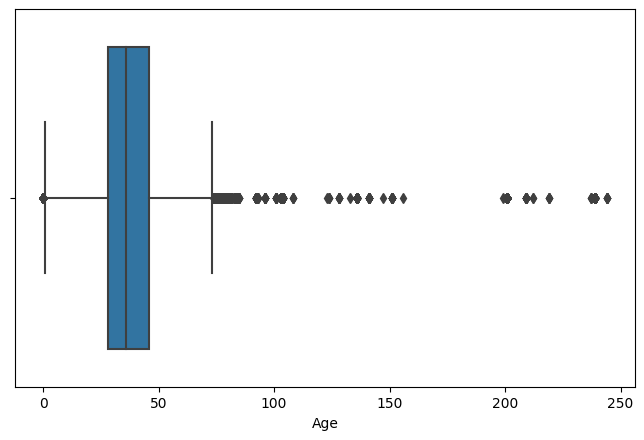

In [ ]:
# Box plot for age

sns.boxplot(combine_df['Age']);

It can be clearly seen that much of outliers are present in age column

Text(0.5, 1.0, 'Top 20 author with number of books')

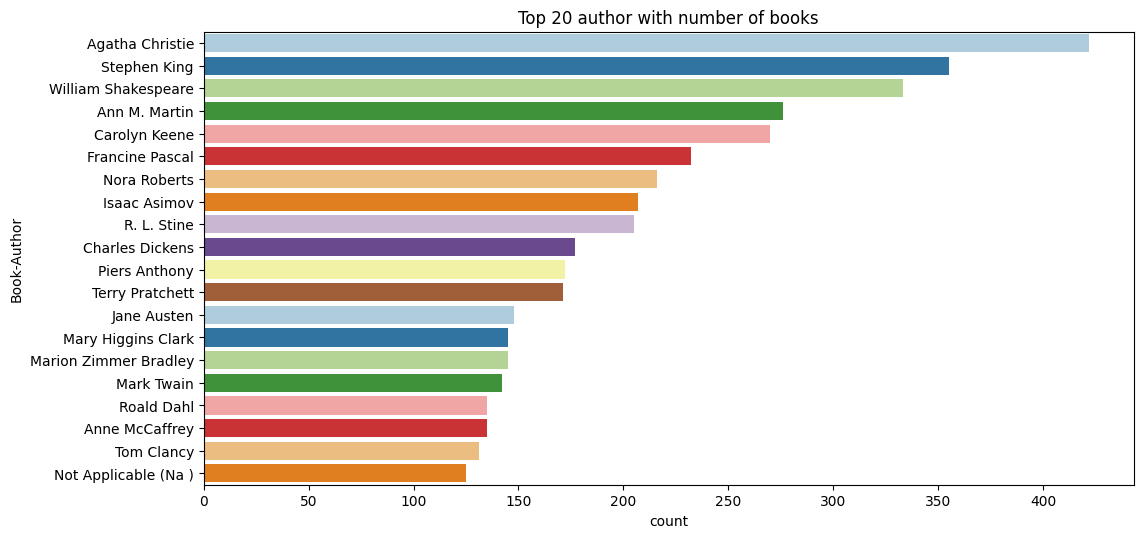

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data= book,order= book['Book-Author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")


Agatha Christie is leading at top with more than 400 counts, followed by William Shakespeare. We can plot some hypothesis point :-

William Shakespeare is one of the popular Author in the world. Still he doesn't have highest number of books.

Among all other Authors, it might happen that few of the Author might have some of the best seller books who have millions of copies been sold in world.

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

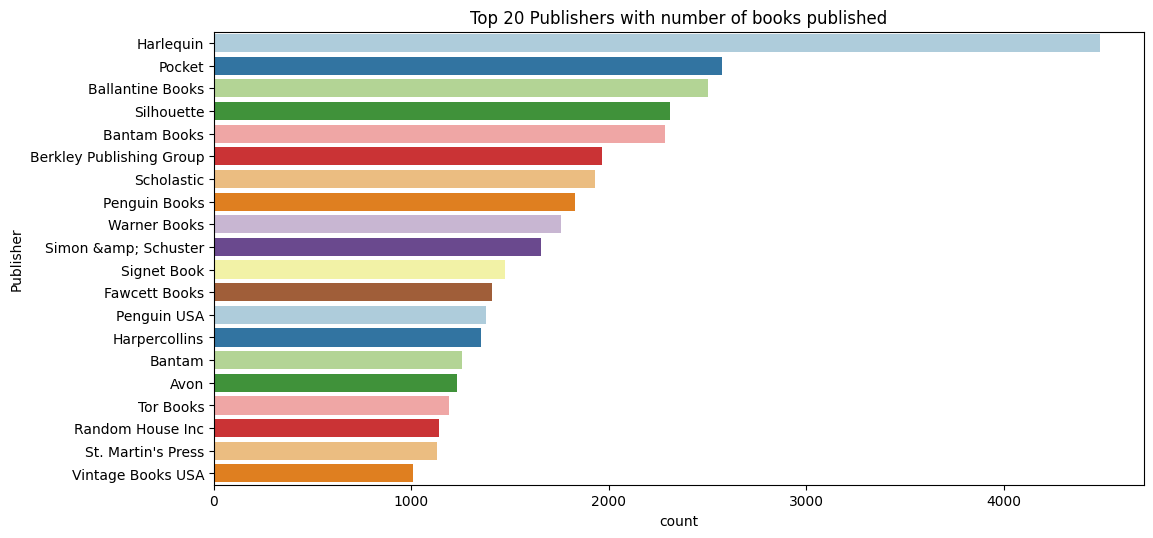

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="Publisher",palette = 'Paired', data=book,order=book['Publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

Harlequin has most number of books published, followed by Silhouette. Hypothesis analysis to focus :-

Some of the top Author's had published their books from Harlequin. We can observe Harlequin publiser's marking better performance than any other publishers.

Penguin Books, Warner Books, Penguin USA, Berkely Publishing Group and many more are among popular publisher's remarking competition with Harlequin.

Though Penguin Books Publisher has less number of books published but it might happen that only top Author's are approaching towards Penguin Books Publisher.

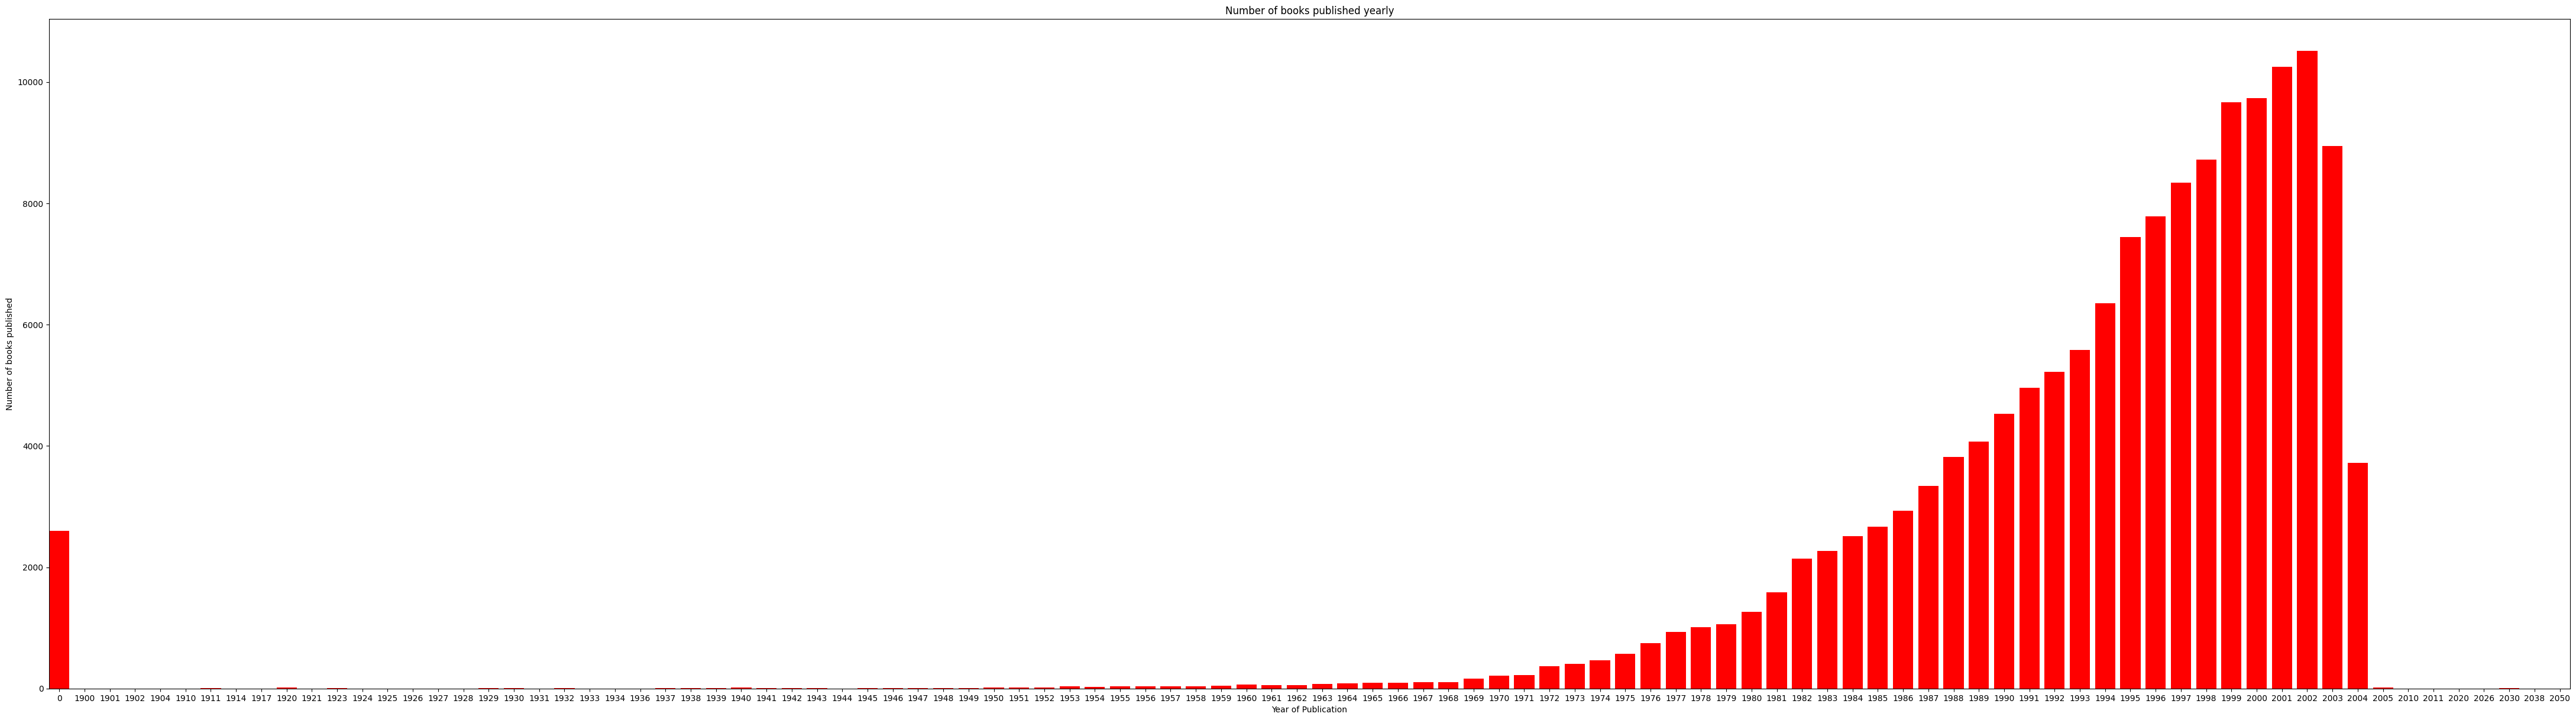

In [ ]:
publications = {}
for year in book['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'Red')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

 So we can see publication years are somewhat between 1950 - 2005 here.The publication of books got vital when it starts emerging from 1950. We can get some hyothesis key points:-

It might happen people starts to understand the importance of books and gradually got productivity habits in their life.

Every user has their own taste to read books based on what particular subject Author uses. The subject of writing books got emerge from late 1940 slowly. Till 1970 it has got the opportunity to recommend books to people or users what they love to read.

The highest peak we can observe is between 1995-2001 year. The user understand what they like to read. Looking towards the raise the recommendation is also increase to understand their interest.

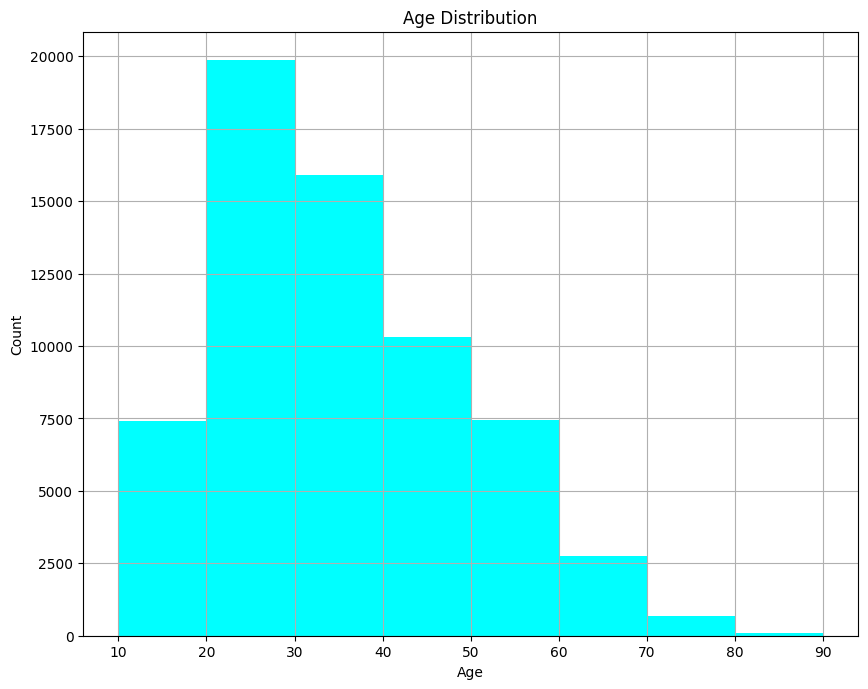

In [ ]:
plt.figure(figsize=(10,8))
user.Age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Looking towards the users age between 20-30 prefer more and somewhat we can also view between 30-40. Let's make some hypothesis analysis:-

It is obvious that most of the user books are from Age 20 to 30.

It might happen that the users are more interested on that subject what Authors are publishing in the market.

The age group between 30-40 are immensely attracted to read books published by Author.

We can observe same pitch for Age group between 40-50 and 50-60. There are can be lot of different reasons.

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

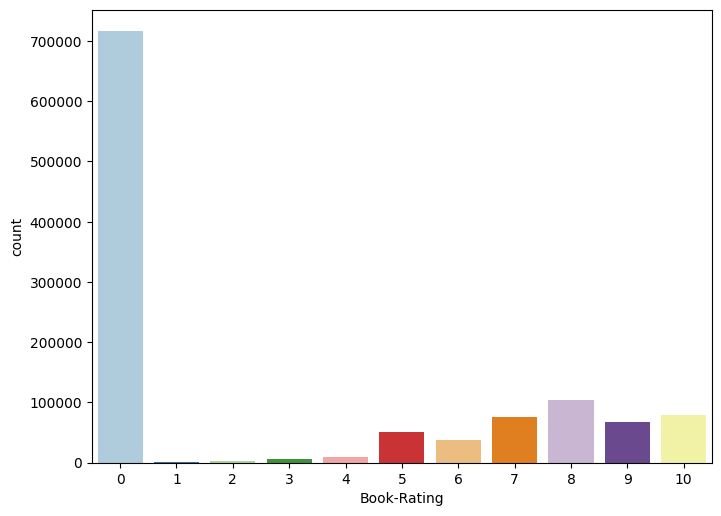

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating",palette = 'Paired',data= rating)

Firstly the above ratings are unique ratings from 'rating' and 'book' dataset.

This countplot shows users have rated 0 the most, which means they haven't rated books at all.

Still we can see pattern to recognize in ratings from 1-10.

Mostly the users have rated 8 ratings out of 10 as per books. It might happen that the feedback is positive but not extremely positive as 10 ratings (i.e best books ever)

<AxesSubplot:title={'center':'\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

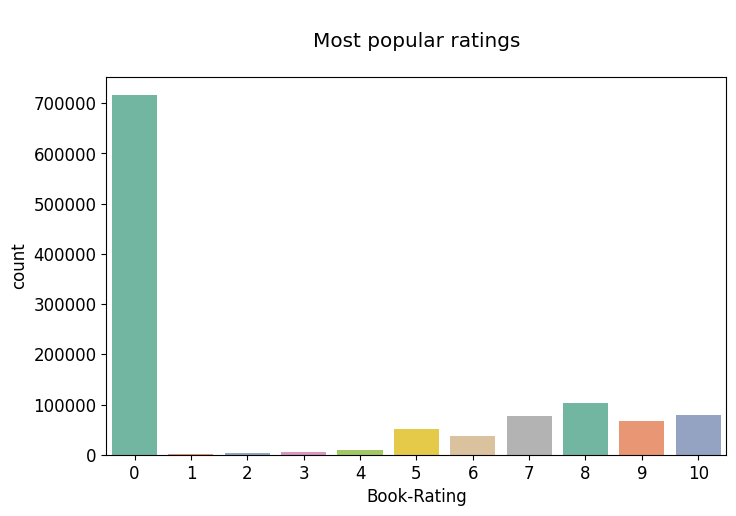

In [ ]:
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=rating, x='Book-Rating',palette='Set2')

Most of users have given above 4 ratings to books

8 is the most common rating given by users

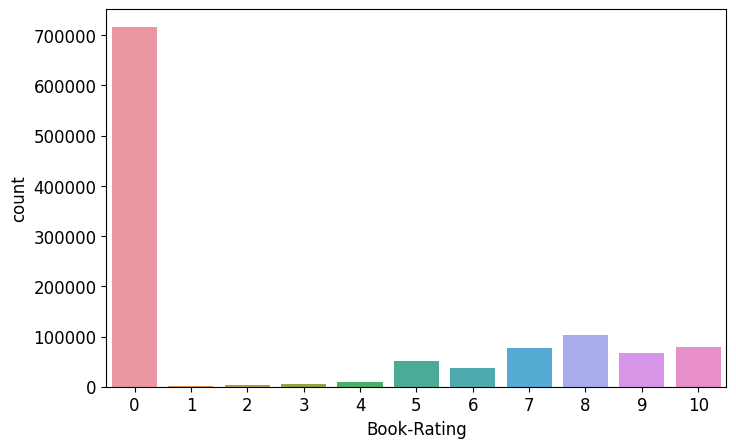

In [ ]:
sns.countplot(data = rating, x = 'Book-Rating')
plt.show()

Firstly the above ratings are unique ratings from 'ratings_data' and 'books_data' dataset. We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0. Let's make some hypothesis assumptions :-


* This countplot shows users have rated 0 the most, which means they haven't rated books at all.

* Still we can see pattern to recognize in ratings from 1-10.

* Mostly the users have rated 8 ratings out of 10 as per books. It might happen that the feedback is positive but not extremely positive as 10 ratings (i.e best books ever).

Text(0.5, 1.0, 'Find outlier data in Age column')

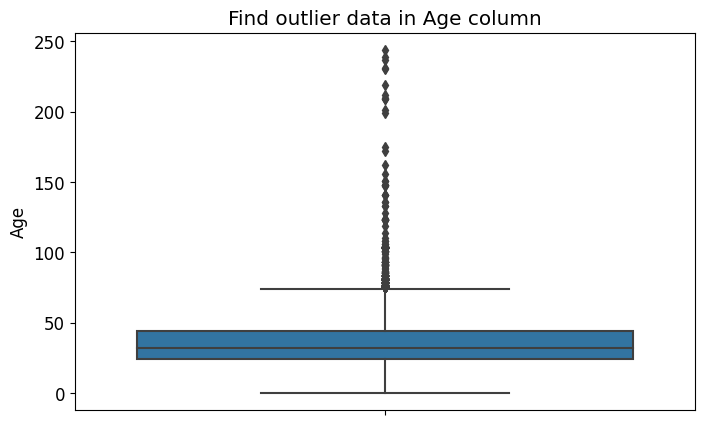

In [ ]:
sns.boxplot(y='Age', data=user)
plt.title('Find outlier data in Age column')

In [ ]:
print(sorted(user.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 99.0, 100.0, 101.0, 103.0, 104.0, 106.0, 108.0, 110.0, 114.0, 119.0, 123.0, 124.0, 128.0, 133.0, 136.0, 141.0, 147.0, 148.0, 151.0, 156.0, 162.0, 172.0, 175.0, 199.0, 201.0, 209.0, 210.0, 212.0, 219.0, 230.0, 231.0, 237.0, 239.0, 244.0]


Age : 90 Ok we have Outlier data in Age

In [ ]:
user['Location']=user['Location'].astype('str')

a=list(user.Location.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['&#21271;&#20140;, west virginia, costa rica', '&#21513;&#26519;, wyoming, china', '&#22235;&#24029;, n, china', '&#22823;&#36830;, n/a, china', '&#24120;&#24503;, &#28246;&#21335;, china', '&#24191;&#24030;, new york, china', '&#25196;&#24030;, dc, china', '&#268;akovec, n/a, croatia', '&#27743;&#33487;, &#27743;&#33487;, china', '&#27993;&#27743;, &#8220;n/a``, colombia', '&#304;stanbul, &#304;stanbul, turkey', '&#304;stanbul, be&#351;ikta&#351;, turkey', '&#304;stanbul, n/a, turkey', '&#304;zmir, n/a, turkey', '&#305;stanbul, istanbul, turkey', '&#31119;&#24314;&#30465;&#21414;&#38376;&#24066;, dc, china', '&#31119;&#24314;, california, usa', '&#321;azy, &#346;l&#261;sk, poland', '&#321;ód&#378;, &#322;ódzkie, poland', '&#321;ód&#378;, lodzkie, poland', '&#321;ód&#378;, n/a, poland', '&#321;ód&#378;, województwo &#322;ódzkie, poland', '&#33436;&#28246;, &#23433;&#24509;, china', '&#35199;&#23433;, &#38485;&#35199;, china', '&#36981;&#20041;, n/a, china', '&#37073;&#24030;&#26159;, 

Text(0.5, 1.0, 'Count of users Country wise')

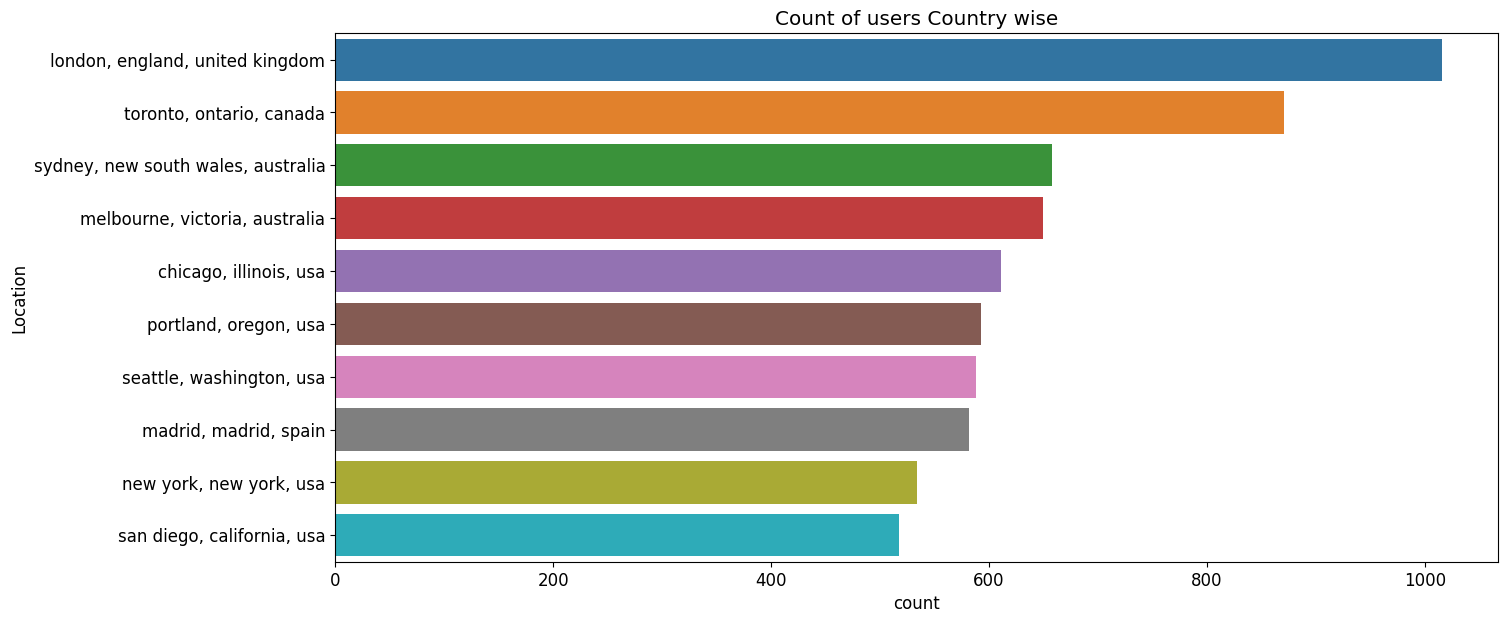

In [ ]:
user['Location'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)
     

plt.figure(figsize=(15,7))
sns.countplot(y='Location',data=user,order=pd.value_counts(user['Location']).iloc[:10].index)
plt.title('Count of users Country wise')

Because we can see which location is most see the poem and count . Most number of users are from LONDON, ENGLAND, UNITED KINGDOM

Text(0.5, 1.0, 'Age Distribution Plot')

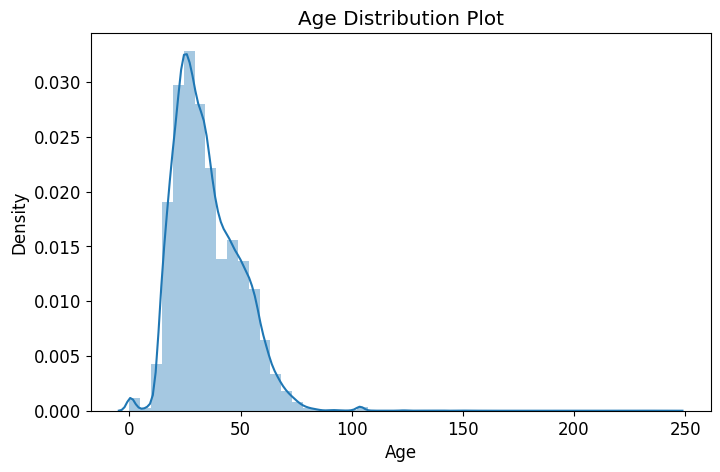

In [ ]:
sns.distplot(user.Age)
plt.title('Age Distribution Plot')

Age value's below 100 and above 20 make much sense for our book rating case

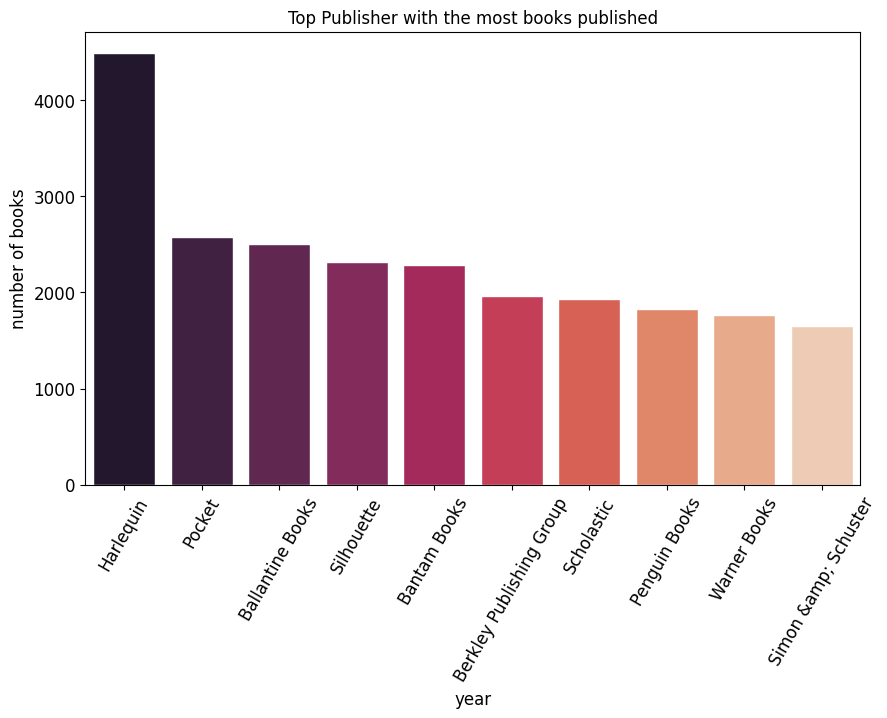

In [ ]:
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = book['Publisher'].value_counts()[:10].index,y = book['Publisher'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top Publisher with the most books published',xlabel = 'year',ylabel = 'number of books')
plt.xticks(rotation = 60)
plt.show()

Harlequin Book has seen the most number of books being published around 800 books.

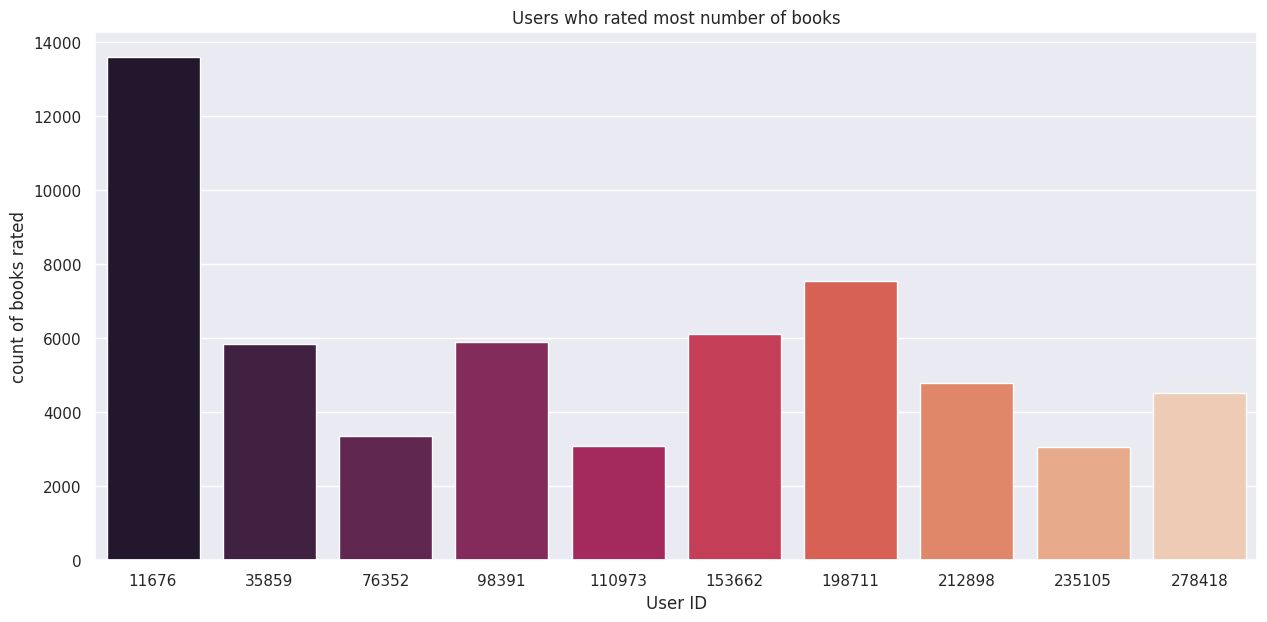

In [ ]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = rating['User-ID'].value_counts()[0:10].index,y = rating['User-ID'].value_counts()[0:10].values,
            palette = 'rocket').set(title="Users who rated most number of books",xlabel = "User ID",ylabel = 'count of books rated')
plt.show()

Users with id 11676 and 198711 have rated the most number of books. They seem to be an avid reader of books.

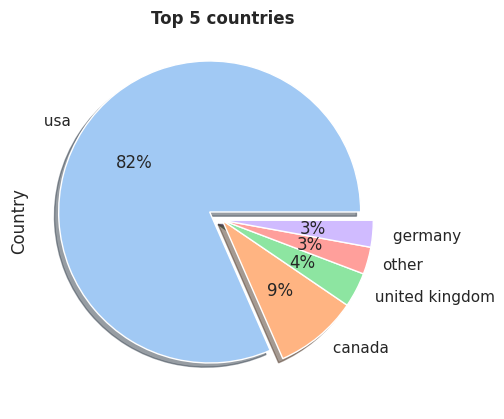

In [ ]:
palette_color = sns.color_palette('pastel')
explode = (0.1, 0, 0, 0, 0)
combine_df.Country.value_counts().iloc[:5].plot(kind='pie', colors=palette_color, autopct='%.0f%%', explode=explode, shadow=True)
plt.title('Top 5 countries', fontweight='bold');

Most of the readers were from USA followed by Canada.

#Recommender Systems

# Popularity based recommendation system

In [ ]:
# Create column average ratings using groupby on book title because some of the books have same book title but different isbn number.

combine_df['Avg_Ratings'] =  combine_df.groupby('Book_Title')['Book_Rating'].transform('mean') # taking average book rating.
 
# Create column number of rating

combine_df['No_Of_Ratings'] = combine_df.groupby('Book_Title')['Book_Rating'].transform('count') # counting the rating of each book

# Create new data frame popular_df
popular_df = combine_df[['Book_Title','Avg_Ratings','No_Of_Ratings']] # average book rating

In [ ]:
# Drop duplicate book

popular_df.drop_duplicates('Book_Title',inplace=True)

In [ ]:
popular_df.head()

,Book_Title,Avg_Ratings,No_Of_Ratings
0,Classical Mythology,0.0,1
1,Clara Callan,3.0,7
8,Decision in Normandy,4.0,2
10,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,2.0,3
13,The Mummies of Urumchi,0.0,1


In [ ]:
# Applying a constraint of number of ratings greater than 200 to only keep the most popular books 

popular_df = popular_df[popular_df['No_Of_Ratings']>=200].sort_values('Avg_Ratings',ascending=False) # or book has got atleast 200 vote

In [ ]:
# Top 10 recommended books
popular_df.head(10)

,Book_Title,Avg_Ratings,No_Of_Ratings
49956,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),5.058559,222
12676,Harry Potter and the Chamber of Secrets (Book 2),4.991071,224
1644,To Kill a Mockingbird,4.750000,204
25783,The Da Vinci Code,4.686486,370
10980,The Secret Life of Bees,4.523026,304
5948,The Lovely Bones: A Novel,4.396304,487
19199,The Red Tent (Bestselling Backlist),4.238267,277
24690,Where the Heart Is (Oprah's Book Club (Paperback)),4.165957,235
1351,Timeline,4.027149,221
8996,Girl with a Pearl Earring,3.922705,207


#Collaborative filtering

#Item Based

Every user's rating at face value can't be considered because if the user is a novice reader with only an experience of reading a couple of books, his/her ratings might not be much relevant for finding similarity among books.

Therefore as a general rule of thumb let's consider only those Users who have rated atleast 50 books and only those books which have got atleast 180 ratings.

the novice reader (typically between 6 to 7 years old); the decoding reader (typically between 7 - 9 years old); the fluent, comprehending reader (typically between 9 - 15 years old); and. the expert reader (typically from 16 years and older).

In [ ]:
combine_df.columns

Index(['User_ID', 'Age', 'ISBN', 'Book_Rating', 'Book_Title', 'Book_Author',
       'Year_Of_Publication', 'Publisher', 'Country', 'Avg_Ratings',
       'No_Of_Ratings'],
      dtype='object')

In [ ]:
combine_df.groupby('User_ID').count()['Book_Rating'].sort_values(ascending = False)

User_ID
11676    9204
98391    5681
35859    4253
16795    2919
76352    2716
         ... 
44396       1
44395       1
44388       1
44383       1
52092       1
Name: Book_Rating, Length: 34325, dtype: int64

In [ ]:
combine_df.groupby('User_ID').count()['Book_Title'].sort_values(ascending = False)

User_ID
11676    9204
98391    5681
35859    4253
16795    2919
76352    2716
         ... 
44396       1
44395       1
44388       1
44383       1
52092       1
Name: Book_Title, Length: 34325, dtype: int64

In [ ]:
print("Shape of merged dataframe : ",combine_df.shape)

Shape of merged dataframe :  (358716, 11)


In [ ]:
new_df= combine_df[combine_df['Book_Rating']!=0] # taking explicit rating_df means Taking where book rating is not equal to zero

In [ ]:
print("Shape of merged dataframe Now : ",new_df.shape)

Shape of merged dataframe Now :  (144354, 11)


In [ ]:
# Applying constraint on user id using it's count 
# consider only those Users who have rated atleast 50 books and only those books which have got atleast 180 ratings.
a = combine_df.groupby('User_ID').count()['Book_Rating'] >=180 

filtered_df = new_df[new_df['User_ID'].isin(a[a].index)]

In [ ]:
# Applying constraint on number of rartings
b=combine_df.groupby('Book_Title').count()['Book_Rating'] >=50 #
filtered_df=filtered_df[filtered_df['Book_Title'].isin(b[b].index)]

In [ ]:
filtered_df.shape

(5953, 11)

In [ ]:
filtered_df.head() # head of filtered dataframe

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country,Avg_Ratings,No_Of_Ratings
15,11676,NaN,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,other,3.148760,121
18,46398,37.0,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,3.148760,121
52,7346,49.0,0440234743,9,The Testament,John Grisham,1999,Dell,usa,3.255507,227
58,11676,NaN,0440234743,9,The Testament,John Grisham,1999,Dell,other,3.255507,227
61,13552,32.0,0440234743,8,The Testament,John Grisham,1999,Dell,usa,3.255507,227


#Simple Popularity based recommendation system

In [ ]:

# function for getting most popular recommendations

def most_popular(df, n):
  if n >= 1 and n <= len(df):
    popular = df.groupby('ISBN')['Book_Rating'].count().reset_index().sort_values(by='Book_Rating', ascending=False).head(n)
    return pd.merge(popular, book, on='ISBN')
  return 'Please enter a valid value of n!'
     

In [ ]:
most_popular(df,5)

,ISBN,Book_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,969,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
1,0316666343,487,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
2,0385504209,366,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
3,0060928336,290,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg
4,0312195516,277,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg


# User Based

Recommender systems have a problem known as user **cold-start**, in which it is hard to provide **personalized** recommendations for users with none or a very few number of consumed items, due to the **lack** of information to model their preferences. For this reason, we are keeping in the dataset only users with at least **50** ratings

In [ ]:
# merged_df.groupby(['Book_Title', 'User_ID']).count().groupby('User_ID').count()['No_Of_Ratings'] # we can also use this code for the same

users_ratings_count_df = combine_df.groupby(['Book_Title', 'User_ID']).size().groupby('User_ID').size()
print('Number of users: %d' % len(users_ratings_count_df))


users_with_enough_ratings_df = users_ratings_count_df[users_ratings_count_df >=50].reset_index()[['User_ID']] # Users with at least 50 ratings
print('Number of users with at least 10 ratings: %d' % len(users_with_enough_ratings_df))

Number of users: 34325
Number of users with at least 10 ratings: 1063


In [ ]:
print('Number of ratings : %d' % len(combine_df))
ratings_from_selected_users_df = combine_df.merge(users_with_enough_ratings_df, 
               how = 'right',
               left_on = "User_ID",
               right_on = "User_ID"
               
               )
print('Number of ratings from users with at least 100 interactions: %d' % len(ratings_from_selected_users_df))

Number of ratings : 358716
Number of ratings from users with at least 100 interactions: 231327


In [ ]:
ratings_from_selected_users_df.head()

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country,Avg_Ratings,No_Of_Ratings
0,243,NaN,0440234743,0,The Testament,John Grisham,1999,Dell,usa,3.256,227
1,243,NaN,0440225701,0,The Street Lawyer,JOHN GRISHAM,1999,Dell,usa,3.196,184
2,243,NaN,042511774X,0,Breathing Lessons,Anne Tyler,1994,Berkley Publishing Group,usa,1.857,91
3,243,NaN,0345465083,0,Seabiscuit,LAURA HILLENBRAND,2003,Ballantine Books,usa,2.112,98
4,243,NaN,0060915544,10,The Bean Trees,Barbara Kingsolver,1989,Perennial,usa,4.013,156


In [ ]:
# Create an object of label encoder

le = preprocessing.LabelEncoder()
le.fit(combine_df['Book_Title'].unique()) 

LabelEncoder()

In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
ratings_full_df = ratings_from_selected_users_df.groupby(['Book_Title','User_ID'])['Book_Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item rated: %d' % len(ratings_full_df))
ratings_full_df.head()

Number of unique user/item rated: 229324


,Book_Title,User_ID,Book_Rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",18995,0.000
1,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",35859,0.000
2,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",55927,0.000
3,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",96448,3.322
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,11601,0.000


In [ ]:
ratings_train_df, ratings_test_df = train_test_split(ratings_full_df, 
                                   test_size=0.20,
                                   stratify=ratings_full_df['User_ID'],
                                   random_state=42)

print('Number of ratings on Train set: %d' % len(ratings_train_df))
print('Number of ratings on Test set: %d' % len(ratings_test_df))

Number of ratings on Train set: 183459
Number of ratings on Test set: 45865


In [ ]:
ratings_train_df['Book_Title'] = le.transform(ratings_train_df['Book_Title'])
ratings_test_df['Book_Title'] = le.transform(ratings_test_df['Book_Title'])

ratings_train_df.head()

,Book_Title,User_ID,Book_Rating
115702,57868,57398,3.000
203559,95897,56399,3.459
79792,39060,28523,0.000
104245,52344,51883,0.000
80345,39476,12538,0.000


In [ ]:
ratings_train_df.duplicated().sum()

0

In [ ]:
# Creating a sparse pivot table with users in rows and items in columns

users_items_pivot_matrix_df = ratings_train_df.pivot(index='User_ID', columns='Book_Title', values= 'Book_Rating').fillna(0)

users_items_pivot_matrix_df.head()

Book_Title,0,2,3,4,5,6,7,8,9,10,...,108881,108882,108883,108885,108887,108889,108891,108893,108894,108896
User_ID,,,,,,,,,,,,,,,,,,,,,
243,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
254,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
507,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
638,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
643,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[243, 254, 507, 638, 643, 741, 882, 929, 1211, 1424]

#Singular Value Decomposition

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

# Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(1063, 74926)

In [ ]:
U.shape # shape of U

(1063, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape # shape of Vt

(15, 74926)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 7.00561942e-04, -8.14145434e-04,  6.76855102e-04, ...,
         0.00000000e+00, -4.90518478e-05,  0.00000000e+00],
       [ 2.10327997e-03,  3.50195179e-04,  2.11121551e-03, ...,
         0.00000000e+00, -1.71130868e-04,  0.00000000e+00],
       [ 5.57757379e-04,  2.29974557e-03,  5.93603205e-04, ...,
         0.00000000e+00, -4.01876129e-05,  0.00000000e+00],
       ...,
       [ 1.70674640e-03, -7.42014996e-04,  1.67761788e-03, ...,
         0.00000000e+00, -1.37121754e-04,  0.00000000e+00],
       [ 3.98022652e-04, -4.46452235e-04,  5.62407604e-04, ...,
         0.00000000e+00, -4.19693775e-05,  0.00000000e+00],
       [ 3.22805725e-03, -1.88712280e-03,  3.80899957e-03, ...,
         0.00000000e+00, -3.23668833e-04,  0.00000000e+00]])

In [ ]:
all_user_predicted_ratings.shape

(1063, 74926)

In [ ]:
# Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,243,254,507,638,643,741,882,929,1211,1424,...,106273,106280,106816,106849,106936,107021,107244,107301,107453,107784
Book_Title,,,,,,,,,,,,,,,,,,,,,
0,0.001,0.002,0.001,0.002,-0.000,0.000,0.001,0.000,0.000,0.001,...,0.000,0.000,0.000,-0.000,-0.000,0.001,0.001,0.002,0.000,0.003
2,-0.001,0.000,0.002,0.004,-0.000,-0.000,0.002,-0.000,0.001,-0.001,...,-0.000,-0.000,-0.000,0.001,0.000,0.006,-0.001,-0.001,-0.000,-0.002
3,0.001,0.002,0.001,0.002,0.000,0.000,0.001,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,-0.000,0.001,0.001,0.002,0.001,0.004
4,0.002,0.009,0.002,0.007,0.000,0.000,0.004,0.001,0.001,0.001,...,0.000,0.001,0.001,0.003,-0.000,0.003,0.005,0.006,0.002,0.015
5,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.002,-0.000,0.001,0.001,0.001,0.000,0.003


In [ ]:
# Number of users
len(cf_preds_df.columns)

1063

In [ ]:
class CFRecommender:
    '''
    Class_Name : CFRecommender
    Description : This class is used to recommend book using SVD(Singular value decomposition)
  
    '''
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None): # constructor of class
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self): # to get the model name
        return self.MODEL_NAME
        
        # ignore_items means we are not interested in those items which user has already seen or which is already present in our training dataset.

    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False): # to recommend the items
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['Book_Title'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'Book_Title', 
                                                          right_on = 'Book_Title')[['recStrength', 'Book_Title']]


        return recommendations_df # returning dataframe of recommended book
    
cf_recommender_model = CFRecommender(cf_preds_df, filtered_df) # making object of CFRecommender

# Location based

Using KNN algorithm, clusters of similar users based on common book ratings can be found and predictions can be made using the average rating of the top-k nearest neighbors.

In [ ]:
book_rating = df[['User_ID','ISBN','Book_Rating','Book_Title']]
print(book_rating.info())
print(book_rating.shape)
print(book_rating.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358716 entries, 0 to 358715
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User_ID      358716 non-null  int64 
 1   ISBN         358716 non-null  object
 2   Book_Rating  358716 non-null  int64 
 3   Book_Title   358716 non-null  object
dtypes: int64(2), object(2)
memory usage: 21.7+ MB
None
(358716, 4)
   User_ID        ISBN  Book_Rating           Book_Title
0        2  0195153448            0  Classical Mythology
1        8  0002005018            5         Clara Callan
2    11400  0002005018            0         Clara Callan
3    11676  0002005018            8         Clara Callan
4    41385  0002005018            0         Clara Callan


In [ ]:
book_rating = book_rating.dropna(axis=0, subset= ['Book_Title'])
book_ratingCount = (book_rating.groupby(by = ['Book_Title'])['Book_Rating'].count().reset_index().rename(columns = {'Book_Rating' : 'totalRatingCount'})[['Book_Title', 'totalRatingCount']])
book_ratingCount.head()

,Book_Title,totalRatingCount
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
2,Dark Justice,1
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",2
4,Final Fantasy Anthology: Official Strategy Guide (Brady Games),4


In [ ]:
rating_with_totalRatingCount = book_rating.merge(book_ratingCount, left_on = 'Book_Title', right_on = 'Book_Title', how ='left')
rating_with_totalRatingCount.head()

,User_ID,ISBN,Book_Rating,Book_Title,totalRatingCount
0,2,0195153448,0,Classical Mythology,1
1,8,0002005018,5,Clara Callan,7
2,11400,0002005018,0,Clara Callan,7
3,11676,0002005018,8,Clara Callan,7
4,41385,0002005018,0,Clara Callan,7


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   108897.000
mean         3.294
std          9.358
min          1.000
25%          1.000
50%          1.000
75%          3.000
max        969.000
Name: totalRatingCount, dtype: float64


In [ ]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    6.000
0.910    6.000
0.920    7.000
0.930    8.000
0.940    9.000
0.950   10.000
0.960   12.000
0.970   15.000
0.980   21.000
0.990   34.000
Name: totalRatingCount, dtype: float64


In [ ]:
popularity_threshold = 100
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User_ID,ISBN,Book_Rating,Book_Title,totalRatingCount
14,8,0399135782,0,The Kitchen God's Wife,121
15,11676,0399135782,9,The Kitchen God's Wife,121
16,29526,0399135782,9,The Kitchen God's Wife,121
17,36836,0399135782,0,The Kitchen God's Wife,121
18,46398,0399135782,9,The Kitchen God's Wife,121


# KNN

In [ ]:

# we kept running into memory issues, so decided to reduce some data by filtering things out
# focussing on users with more than 3 ratings and top 10% most frequently rated books
ratings = 3

user = df['User_ID'].value_counts()
user_list = user[user >ratings].index.to_list()
filter_df = df[df['User_ID'].isin(user_list)]

print('Number of users with ratings more than 3 are: {}'.format(filter_df.shape[0]))

Number of users with ratings more than 3 are: 325269


In [ ]:

# top 10% most frequently rated books
required = len(filter_df.ISBN.unique()) * 0.1

user_list = filter_df['Book_Title'].value_counts().head(int(required)).index.to_list()
filter_df = filter_df[filter_df['Book_Title'].isin(user_list)]

print('Number of top 10% users are: {}'.format(filter_df.shape[0]))

Number of top 10% users are: 176760


In [ ]:
# shape of final dataset
filter_df.shape

(176760, 9)

In [ ]:
# creating a pivot table
table = filter_df.pivot_table(columns='User_ID', index='Book_Title', values='Book_Rating')
table

User_ID,8,14,17,44,53,67,75,99,114,165,...,107736,107768,107780,107784,107795,107825,107834,107850,107852,107865
Book_Title,,,,,,,,,,,,,,,,,,,,,
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Q-Space (Star Trek The Next Generation, Book 47)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Q-Zone (Star Trek The Next Generation, Book 48)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
one hundred years of solitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# filling null values
table.fillna(0, inplace=True)
table

User_ID,8,14,17,44,53,67,75,99,114,165,...,107736,107768,107780,107784,107795,107825,107834,107850,107852,107865
Book_Title,,,,,,,,,,,,,,,,,,,,,
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Zone (Star Trek The Next Generation, Book 48)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one hundred years of solitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# converting to sparse matrix
from scipy.sparse import csr_matrix

sparse = csr_matrix(table)
sparse

<11463x8682 sparse matrix of type '<class 'numpy.float64'>'
	with 65692 stored elements in Compressed Sparse Row format>

In [ ]:
#Creating an instance of KNN
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
# function to get recommendations

def get_recommendations(name, n):

  # getting book id
  book_id= np.where(table.index==name)[0][0]

  # distances and suggestions based on similarity
  distances, suggestions = model.kneighbors(table.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  suggestions = suggestions.flatten().tolist()

  for i in range(len(suggestions)):
    # if book is same as input
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[suggestions[i]])
  return

In [ ]:
get_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Keeper of the Heart
Eternity
The First Four Years (Little House)
Chocolate For A Womans Heart : 77 Stories Of Love Kindness And Compassion To Nourish Your Soul And Sweeten Yo
BURY ME DEEP : BURY ME DEEP
Last Chance Saloon: A Novel
Maybe (Maybe Not : Second Thoughts from a Secret Life)
Stick Figure: A Diary of My Former Self


# KNN with cosine metric

In [ ]:
#Creating an instance of KNN with cosine metric

cosine = NearestNeighbors(metric='cosine', algorithm='brute')
cosine.fit(sparse)
     

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:

# function to get recommendations

def get_cosine(name, n):

  print('Cosine Similarity based recommendations.\n')

  # distances and indices based on similarity
  distances, indices = cosine.kneighbors(table.loc[name].values.reshape(1, -1), n_neighbors = n+1)

  for i in range(len(distances.flatten())):
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[indices.flatten()[i]])
  return

In [ ]:
get_cosine('Harry Potter and the Chamber of Secrets (Book 2)', 10)

Cosine Similarity based recommendations.

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)
Keeper of the Heart
Calvin and Hobbes
Eternity
The Talented Mr. Ripley (Vintage Crime/Black Lizard)
The Hobbit: or There and Back Again


# Evalute

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

This evaluation method works as follows:

* For each user
    * For each item the user has interacted in test set
        * Sample 100 other items the user has never interacted.   
        * Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics

In [ ]:
#Indexing by personId to speed up the searches during evaluation
ratings_full_indexed_df = ratings_full_df.set_index('User_ID') # set the index as User_ID
ratings_train_indexed_df = ratings_train_df.set_index('User_ID')
ratings_test_indexed_df = ratings_test_df.set_index('User_ID')

`The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [ ]:
def get_items_rated(person_id, ratings_df):
    rated_items = ratings_df.loc[person_id]['Book_Title']
    return set(rated_items if type(rated_items) == pd.Series else [rated_items]) # 

In [ ]:
#Top-N accuracy metrics consts

EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    def get_not_rated_items_sample(self, person_id, sample_size, seed=42):

            rated_items = get_items_rated(person_id, ratings_full_indexed_df)
            all_items = set(filtered_df['Book_Title'])
            non_rated_items = all_items - rated_items

            random.seed(seed) 
            non_rated_items_sample = random.sample(non_rated_items, sample_size)
            return set(non_rated_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user

    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        rated_values_testset = ratings_test_indexed_df.loc[person_id]
        
        if type(rated_values_testset['Book_Title']) == pd.Series:
            person_rated_items_testset = set(rated_values_testset['Book_Title'])
        else:
            person_rated_items_testset = set([int(rated_values_testset['Book_Title'])])
            
        rated_items_count_testset = len(person_rated_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_rated(person_id, ratings_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_rated_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_rated_items_sample = self.get_not_rated_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_rated_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['Book_Title'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['Book_Title'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(rated_items_count_testset)
        recall_at_10 = hits_at_10_count / float(rated_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'rated_count': rated_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model): # taking model and self which is an object of respective class
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(ratings_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('rated_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['rated_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['rated_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()  

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
1176 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.5903796305410638, 'recall@10': 0.5903796305410638}


,hits@5_count,hits@10_count,rated_count,recall@5,recall@10,_person_id
2,712,712,1339,0.531740,0.531740,11676
11,418,418,1131,0.369584,0.369584,98391
9,72,72,365,0.197260,0.197260,189835
40,181,181,364,0.497253,0.497253,153662
264,67,67,234,0.286325,0.286325,23902
138,129,129,203,0.635468,0.635468,235105
93,64,64,202,0.316832,0.316832,76499
219,88,88,191,0.460733,0.460733,171118
66,123,123,189,0.650794,0.650794,16795
189,74,74,188,0.393617,0.393617,248718


# **<u>Conclusions</u>**


* First We got insights that the majority of users did not rate the books. Also majority of the books were rated <b>8/10</b>.

* The majority of the readers were in the age group of <b>20-45</b>.

*  We saw an exponential increase in the publication of books after the year <b>1950</b>.

* <i>Agatha christie, and William Shakespeare</i> wrote the maximum no. of books.

* And the maximum books were from the publication house <b>Harlequin and Silhouette</b>.

* <b>Harry Potter authored by J K Rowling</b> had got the best average ratings followed by To Kill a Mockingbird and The Da Vinci Code.

* Finally, we evaluated our models using recall at @5 and recall @10 where we got the value to be <b>59%</b>.